In [15]:
import pandas as pd

In [16]:
bitcoin = pd.read_excel('GDAX.BTC-USD_790301_230316.xlsx')
smp500 = pd.read_csv('^spx_d (1).csv')

In [17]:
bitcoin = bitcoin.iloc[:,[2,4,7]]
bitcoin.drop(range(28), inplace=True)
bitcoin.columns = ['Date', 'Open', 'Close']
bitcoin['Trend'] = bitcoin['Open']-bitcoin['Close']
bitcoin = bitcoin[['Date', 'Trend']]
bitcoin

,Date,Trend
28,20150201,-10.32
29,20150202,-9.44
30,20150203,8.43
31,20150204,1.66
32,20150205,10.35
...,...,...
2985,20230312,-1599.74
2986,20230313,-2003.98
2987,20230314,-542.65
2988,20230315,384.45


In [18]:
smp500['Trend'] = smp500['Open']-smp500['Close']
smp500 = smp500[['Date','Trend']]
smp500 = smp500.iloc[36839:38903]
smp500

,Date,Trend
36839,2015-01-02,0.70
36840,2015-01-05,33.86
36841,2015-01-06,19.54
36842,2015-01-07,-20.35
36843,2015-01-08,-31.53
...,...,...
38898,2023-03-09,80.34
38899,2023-03-10,51.18
38900,2023-03-13,-20.64
38901,2023-03-14,-25.28


<AxesSubplot: >

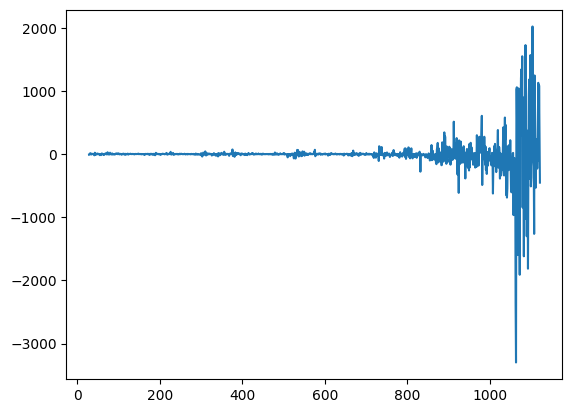

In [19]:
bitcoin.iloc[0:365*3]['Trend'].plot()

<AxesSubplot: >

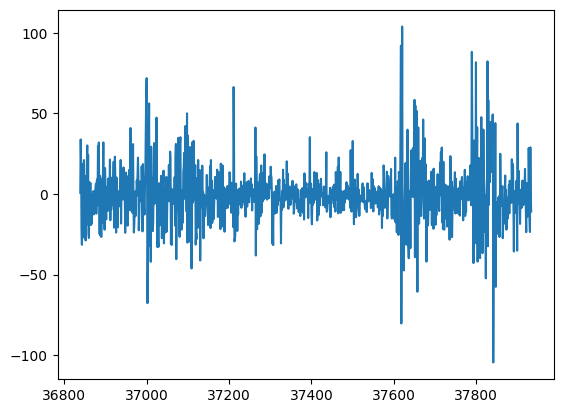

In [20]:
smp500.iloc[0:365*3]['Trend'].plot()

In [21]:

smp500['Date'] =pd.to_datetime(smp500['Date'])
smp500['Date']


36839   2015-01-02
36840   2015-01-05
36841   2015-01-06
36842   2015-01-07
36843   2015-01-08
           ...    
38898   2023-03-09
38899   2023-03-10
38900   2023-03-13
38901   2023-03-14
38902   2023-03-15
Name: Date, Length: 2064, dtype: datetime64[ns]

In [22]:
smp500.index=smp500['Date']
smp500.head()

,Date,Trend
Date,,
2015-01-02,2015-01-02,0.70
2015-01-05,2015-01-05,33.86
2015-01-06,2015-01-06,19.54
2015-01-07,2015-01-07,-20.35
2015-01-08,2015-01-08,-31.53


In [23]:
smp500['Year']=smp500.index.year
smp500['Mon']=smp500.index.month
smp500['Day']=smp500.index.day
dates=smp500[['Year','Mon','Day']]

smp500.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
smp500

Date  Trend  Year  Mon  Day
Year Mon Day                                  
2015 1   2   2015-01-02   0.70  2015    1    2
         5   2015-01-05  33.86  2015    1    5
         6   2015-01-06  19.54  2015    1    6
         7   2015-01-07 -20.35  2015    1    7
         8   2015-01-08 -31.53  2015    1    8
...                 ...    ...   ...  ...  ...
2023 3   9   2023-03-09  80.34  2023    3    9
         10  2023-03-10  51.18  2023    3   10
         13  2023-03-13 -20.64  2023    3   13
         14  2023-03-14 -25.28  2023    3   14
         15  2023-03-15 -15.19  2023    3   15

[2064 rows x 5 columns]

In [24]:
year_day_mean=smp500.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Trend']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
mon_mean.head()


C:\Users\goldme\AppData\Local\Temp\ipykernel_13604\2704167518.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=smp500.groupby(level=[0,1]).mean()


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Year,,,,,,,,,,,,
2015,3.214500,-5.581053,1.536818,-0.834762,-0.844000,2.110909,-1.154091,6.061905,2.861905,-6.873182,-0.340500,1.926818
2016,6.041053,0.386500,-6.341364,-0.461429,-1.455714,-0.421818,-3.255500,0.130435,-0.117143,3.163810,-3.145714,-0.491429
2017,-1.584000,-4.325263,0.046522,0.840526,-0.875909,0.698182,-1.063000,0.526957,-1.508500,-1.190000,-3.299524,1.729500
2018,-4.117143,5.114211,5.086190,4.016190,-2.371818,0.618571,-4.106190,-3.274783,0.069474,10.610870,-3.579524,13.395263
2019,-9.491429,-4.722105,-0.388571,-2.989524,0.646818,-2.480000,-0.321364,3.769545,-0.073000,-0.721304,-3.345000,-1.486190


In [25]:
corr=mon_mean.corr()
corr

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Jan,1.000000,-0.004904,-0.703406,0.525296,-0.597460,0.693302,-0.721520,0.239928,0.532581,-0.606535,0.294842,0.140907
Feb,-0.004904,1.000000,0.241695,0.224240,-0.268473,0.255801,-0.260008,-0.549545,0.178741,0.571520,-0.634073,0.308716
Mar,-0.703406,0.241695,1.000000,0.003612,-0.024485,-0.047290,0.294685,-0.097329,-0.295223,0.482542,-0.307300,0.473769
Apr,0.525296,0.224240,0.003612,1.000000,-0.769320,0.901209,-0.815336,0.514214,0.132995,-0.272474,-0.312641,0.776072
May,-0.597460,-0.268473,-0.024485,-0.769320,1.000000,-0.640960,0.628914,-0.194919,-0.039510,0.047515,0.036907,-0.832450
Jun,0.693302,0.255801,-0.047290,0.901209,-0.640960,1.000000,-0.866633,0.420024,0.434358,-0.460107,-0.193386,0.556413
Jul,-0.721520,-0.260008,0.294685,-0.815336,0.628914,-0.866633,1.000000,-0.206118,-0.649491,0.539216,-0.026458,-0.444397
Aug,0.239928,-0.549545,-0.097329,0.514214,-0.194919,0.420024,-0.206118,1.000000,-0.251521,-0.465282,0.002155,0.300689
Sep,0.532581,0.178741,-0.295223,0.132995,-0.039510,0.434358,-0.649491,-0.251521,1.000000,-0.615721,0.412934,-0.202292
Oct,-0.606535,0.571520,0.482542,-0.272474,0.047515,-0.460107,0.539216,-0.465282,-0.615721,1.000000,-0.622272,0.178280


([<matplotlib.axis.YTick at 0x242c29ef160>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

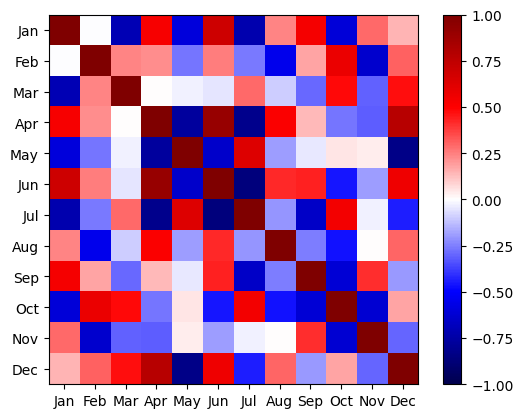

In [26]:
import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)

In [27]:
bitcoin['Date'] = bitcoin['Date'].map(lambda x:str(x)[0:4]+'-'+str(x)[4:6]+'-'+str(x)[6:8]) 
bitcoin['Date'] = pd.to_datetime(bitcoin['Date'])

bitcoin.index=bitcoin['Date']
bitcoin['Year']=bitcoin.index.year
bitcoin['Mon']=bitcoin.index.month
bitcoin['Day']=bitcoin.index.day
dates=bitcoin[['Year','Mon','Day']]

bitcoin.index=pd.MultiIndex.from_tuples(dates.values.tolist(), names=dates.columns)
bitcoin

Date    Trend  Year  Mon  Day
Year Mon Day                                    
2015 2   1   2015-02-01   -10.32  2015    2    1
         2   2015-02-02    -9.44  2015    2    2
         3   2015-02-03     8.43  2015    2    3
         4   2015-02-04     1.66  2015    2    4
         5   2015-02-05    10.35  2015    2    5
...                 ...      ...   ...  ...  ...
2023 3   12  2023-03-12 -1599.74  2023    3   12
         13  2023-03-13 -2003.98  2023    3   13
         14  2023-03-14  -542.65  2023    3   14
         15  2023-03-15   384.45  2023    3   15
         16  2023-03-16  -648.61  2023    3   16

[2962 rows x 5 columns]

C:\Users\goldme\AppData\Local\Temp\ipykernel_13604\3900021506.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  year_day_mean=bitcoin.groupby(level=[0,1]).mean()


([<matplotlib.axis.YTick at 0x242c2d37d00>,
 [Text(0, 0, 'Jan'),
  Text(0, 1, 'Feb'),
  Text(0, 2, 'Mar'),
  Text(0, 3, 'Apr'),
  Text(0, 4, 'May'),
  Text(0, 5, 'Jun'),
  Text(0, 6, 'Jul'),
  Text(0, 7, 'Aug'),
  Text(0, 8, 'Sep'),
  Text(0, 9, 'Oct'),
  Text(0, 10, 'Nov'),
  Text(0, 11, 'Dec')])

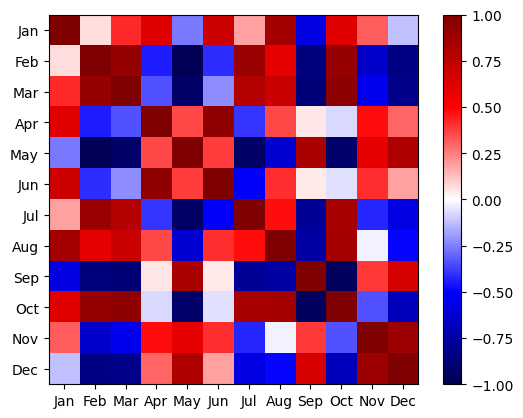

In [28]:

year_day_mean=bitcoin.groupby(level=[0,1]).mean()
tmpmn=year_day_mean['Trend']
mon_mean=tmpmn.unstack()
mon_mean.columns=['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']

corr=mon_mean.corr()

import matplotlib.pyplot as plt
plt.imshow(corr,cmap='seismic',interpolation='none',vmin=-1,vmax=1)
plt.colorbar()
plt.xticks(range(len(corr)),corr.columns)
plt.yticks(range(len(corr)),corr.columns)